In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver3D as s3
import matrix2D as m2
import upwind as up
import bdf23D as bdf2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh = IntervalMesh(20, 0, 1)

In [3]:
m0 = 1e-3
dt = 0.1
T = 100
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/test1D_dt0.1_T100_bdf2"

solver = bdf2.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
solver.solve()

Solving linear variational problem.
iter=1: norm=7.86342e-06
time=0.1: 
iter=1: norm=0.00148218
iter=2: norm=2.43401e-06
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
time=0.2: 
iter=1: norm=5.04182e-05
Solving linear variational problem.
time=0.3: 
iter=1: norm=5.23558e-05
Solving linear variational problem.
time=0.4: 
iter=1: norm=5.445e-05
Solving linear variational problem.
time=0.5: 
iter=1: norm=5.66814e-05
Solving linear variational problem.
time=0.6: 
iter=1: norm=5.90219e-05
Solving linear variational problem.
time=0.7: 
iter=1: norm=6.14639e-05
Solving linear variational problem.
time=0.8: 
iter=1: norm=6.40083e-05
Solving linear variational problem.
time=0.9: 
iter=1: norm=6.66572e-05
Solving linear variational problem.
time=1: 
iter=1: norm=6.94149e-05
S

In [ ]:
dt = 0.1
T = 40
save_interval = 2
# V = FunctionSpace(mesh,"P",1)
mesh  = IntervalMesh(20, 0, 1)
c0file = XDMFFile('solutions/test1D_ds0.005_dt0.5_T400/c.xdmf')
n0file = XDMFFile('solutions/test1D_ds0.005_dt0.5_T400/n.xdmf')
V = FunctionSpace(mesh,"P",1)
c0 = Function(V)
n0 = Function(V)

c0file.read_checkpoint(c0,"c",78)
n0file.read_checkpoint(n0,"n",78)
# # n0 = nnew
# times = [0+1,1+1,2+1,3+1,4+1,7+1,8+1,9+1,10+1,11+1,14+1,15+1,16+1,17+1,18+1,21+1,22+1,23+1,24+1,25+1,28+1,29+1,30+1,31+1,32+1]
# doses = 2*np.ones_like(times)
# # times = [0+1,7+1,14+1,21+1,28+1]
# # doses = 10*np.ones_like(times)

# path_sol = "solutions/test1D_rt"
# solver = bdf2.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.solve()

: 

Text(0, 0.5, 'mass')

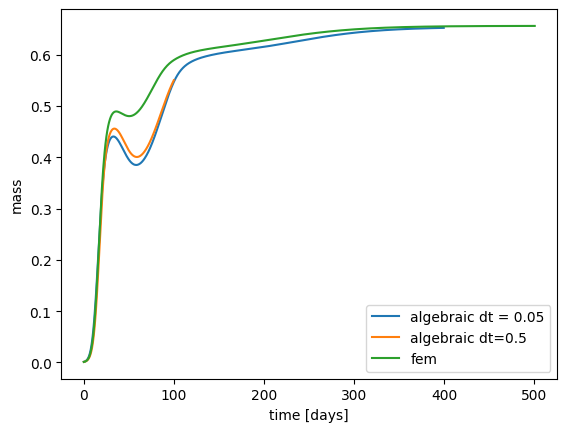

In [3]:
mass = np.load('solutions/test1D_ds0.005_dt0.5_T400/mass.npy')
time1 = np.arange(0,400,0.5)
plt.plot(time1,mass)
mass2 = np.load('solutions/test1D_dt0.1_T100_bdf2/mass.npy')
time2 = np.arange(0,100,0.1)
plt.plot(time2,mass2)
mass3 = np.load('../Model1D/solutions/B_Km1e-2/mass.npy')
time3 = np.arange(0,501,0.5)
plt.plot(time3,mass3)
plt.legend(['algebraic dt = 0.05','algebraic dt=0.5', 'fem'])
plt.xlabel('time [days]')
plt.ylabel('mass')

0.23646951340101044 0.300996642768811 0.4634805604255207


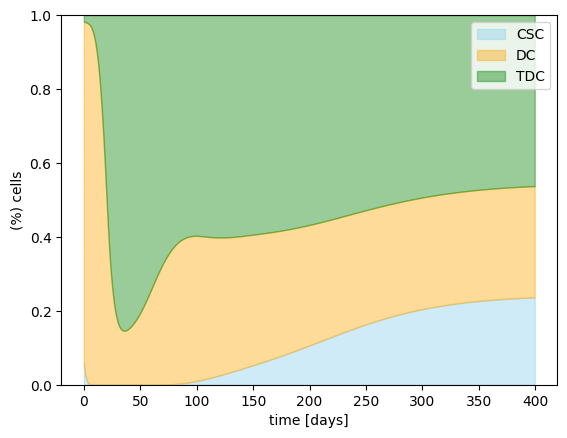

In [32]:
path_sol = 'solutions/t400_masses'
csc = np.load(path_sol +  '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
print(csc[-1],dc[-1],tdc[-1])
# print(mass2)

time=np.arange(0,400,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])

## 2D

In [2]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import matrix2D as m2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
# mesh2D = UnitSquareMesh(20,20)
mesh2D = RectangleMesh(Point(-1,-1),Point(1,1),20,20)

In [3]:
m0 = 1e-3
dt = 0.5
T = 200
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V2D = FunctionSpace(mesh2D,"P",2)
# n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.008),s=0,degree=2)
c0 = interpolate(Constant(1.0), V2D)
path_sol = "solutions/test2D_Vsource_T200_dt0.5"

solver = m2.MatrixSolver(mesh2D, V2D, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
x = solver.solve()

time=0: 
Solving linear variational problem.
iter=1: norm=0.864218
Solving linear variational problem.
iter=2: norm=1.16764e-07
LGMRES converged [iter= 1, time=4.37s, res=1.9e-10]
time=0.5: 
Solving linear variational problem.
iter=1: norm=0.000106407
LGMRES converged [iter= 1, time=2.47s, res=1.6e-10]
time=1: 
Solving linear variational problem.
iter=1: norm=2.01316e-05
LGMRES converged [iter= 1, time=2.71s, res=1.7e-10]
time=1.5: 
Solving linear variational problem.
iter=1: norm=2.43622e-05
LGMRES converged [iter= 1, time=2.59s, res=1.5e-10]
time=2: 
Solving linear variational problem.
iter=1: norm=2.9362e-05
LGMRES converged [iter= 1, time=2.64s, res=1.5e-10]
time=2.5: 
Solving linear variational problem.
iter=1: norm=3.52215e-05
LGMRES converged [iter= 1, time=2.59s, res=1.3e-10]
time=3: 
Solving linear variational problem.
iter=1: norm=4.20457e-05
LGMRES converged [iter= 1, time=2.11s, res=1.2e-10]
time=3.5: 
Solving linear variational problem.
iter=1: norm=4.99429e-05
LGMRES conv

0.42463091001287406 0.4537570451477279


(0.0, 0.8)

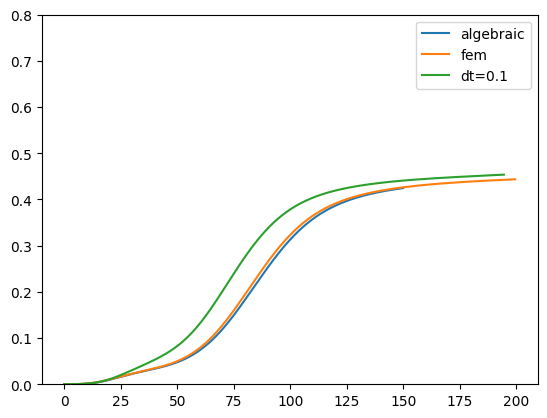

In [21]:
mass = np.load('solutions/test2D_Vsource_T150_dt0.1/mass.npy')
mass05 = np.load('solutions/test2D_Vsource_T200_dt0.5/mass.npy')
mass2 = np.load('../Model2D/solutions/V3e5_T150_ref20x20/mass.npy')
mass2 = mass2[:-10]
mass_ext = np.load("../Model2D/solutions/V3e5_ref20x20_extension/mass.npy")
masstot = np.concatenate((mass2,mass_ext))
# mass3 = np.load('solutions/test2D_Vsource_T150_dt0.1/mass.npy')
time = np.arange(0,150,0.1)
time05 = np.arange(0,200,0.5)
time2 = np.arange(0,195,0.5)
plt.plot(time,mass)
plt.plot(time05,mass05)
plt.plot(time2,masstot)
time01 = np.arange(0,150,0.1)
# plt.plot(time01,mass3)
plt.legend(['algebraic','fem','dt=0.1'])
print(mass[-1],masstot[-1])
plt.ylim([0,0.8])

Text(0, 0.5, 'mass')

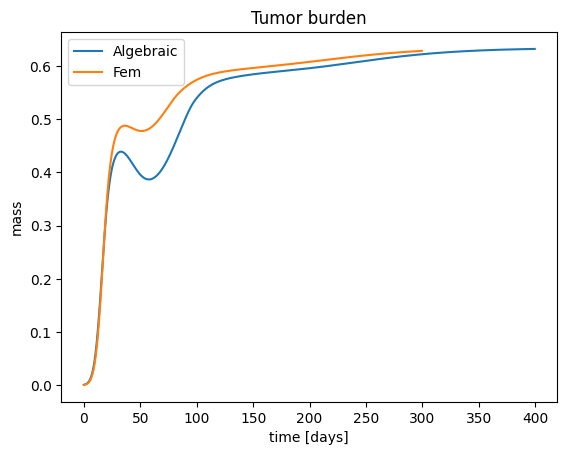

In [4]:
mass = np.load('solutions/test2D_ds0.005_dt0.5_T400_Km0.005/mass.npy')
time = np.arange(0,400,0.5)
plt.plot(time,mass)
mass2 = np.load('../Model2D/solutions/m01e-3_T300_mesh10/mass.npy')
time2 = np.arange(0,300,0.5)
plt.plot(time2,mass2)
# mass3 = np.load('solutions/test2D_Bc/mass.npy')
# time3 = np.arange(0,100,0.5)
# plt.plot(time3,mass3)
# plt.xlim([0,600])
plt.legend(['Algebraic','Fem','3'])
plt.title('Tumor burden')
plt.xlabel('time [days]')
plt.ylabel('mass')

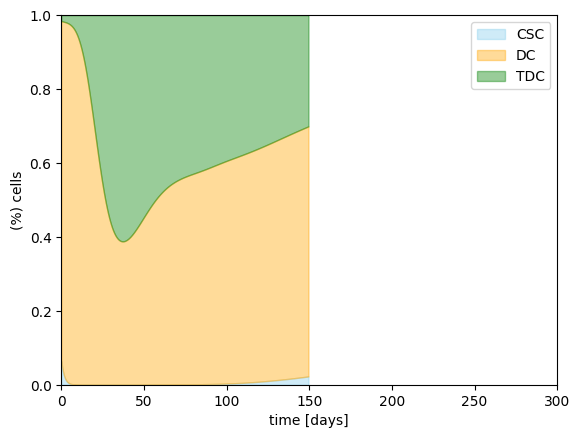

In [10]:
path_sol = 'solutions/test2D_Vsource_T150_dt0.5'
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol +'/dc_mass.npy')
tdc = np.load(path_sol +  '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
# print(csc[600],dc[600],tdc[600])
# print(mass[-1])

time=np.arange(0,150,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
plt.xlim([0,300])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])


In [ ]:
Ns = int(1/0.005)
# vec = []
# for i in range(Ns-1):
#     vec.extend(x[i])
mesh3D = UnitCubeMesh(5,5,5)
V3D = FunctionSpace(mesh3D,"P",1)
# print(mesh3D.coordinates())
x = np.arange(0,mesh3D.coordinates().shape[0])
# print(x)
xnew = [x[i] for i in dof_to_vertex_map(V3D)]
f3D = Function(V3D)
f3D.vector()[:] = xnew
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sol = ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=f3D.vector()[:])
print(f3D(1,0,0))
plt.colorbar(sol)
# print(vec[:])
# print(max(n_vect))


In [ ]:
mesh2D = UnitSquareMesh(5,5)
V2D = FunctionSpace(mesh2D,"P",1)
f2D = Function(V2D)
print(len(vec))
f2D.vector()[:] = vec[-36:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],np.ones(mesh2D.coordinates().shape[0]),c=f2D.compute_vertex_values())
ax.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],np.zeros(mesh2D.coordinates().shape[0]),c=f2D.compute_vertex_values())
# plot(f2D)
plt.show()
plt.colorbar(plot(f2D))

In [ ]:
# Ns = int(1/0.005)
mesh3D = UnitCubeMesh(3,3,3)
V3D = FunctionSpace(mesh3D,"P",1)
# print(mesh3D.coordinates())
x_vec = np.arange(0,mesh3D.coordinates().shape[0])
# print(x)
vec = [x_vec[i] for i in dof_to_vertex_map(V3D)]
f3D = Function(V3D)
f3D.vector()[:] = vec
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ciao = ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=f3D.compute_vertex_values())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(ciao)
print(f3D(0,0,0.3333))
print(f3D(0.33,0,0))
print(f3D(1,0.333,0.333))
print(f3D(0,1,0))
print(f3D(1,1,0))
print(dof_to_vertex_map(V3D))


In [5]:
import pyvista as pv
mesh = BoxMesh(Point(-1,-1,0),Point(1,1,1),20,20,200)

xdmf_file = XDMFFile( "cube.xdmf")
xdmf_file.parameters["rewrite_function_mesh"] = False  # Important for preserving cell functions

# Write the mesh and close the XDMF file
xdmf_file.write(mesh)
xdmf_file.close()

mesh = pv.read('cube.xdmf')

# Salva il mesh in formato VTK
mesh.save('boxmesh.vtk')